In [2]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import SUBSET_LANGUAGES

plt.rcParams['font.family'] = 'P052'
plt.rcParams['font.serif'] = ['Times New Roman']

/nlp/scr/kallini/miniconda3/envs/charlm-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
colors = ['red', 'deeppink', 'dodgerblue', 'green',
          'orange', 'orangered', 'purple', 'violet',
          'yellowgreen', 'olivedrab', 'magenta']

languages = SUBSET_LANGUAGES.values()

In [5]:
# Example usage with the new parameter
file_paths = {
    "ByT5": 'eval_results/span_corruption/T5/t5_span_corruption_seed28_en_only.csv',
    "MrT5,\nα=5e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.005_seed28_en_only.csv',
    "MrT5,\nα=6e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.006_seed28_en_only.csv',
    "MrT5,\nα=8e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.008_seed28_en_only.csv',
    "MrT5,\nα=1e–2": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.01_seed28_en_only.csv',
    "MrT5,\nα=1.4e–2": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.014_seed28_en_only.csv',
}

In [6]:
def extract_data_from_files(file_paths, column_name):
    # Create an empty dictionary to store the data
    data = {}
    
    # Read each CSV file and extract the specified column
    for i, (model_name, file_path) in enumerate(file_paths.items()):
        df = pd.read_csv(file_path)

        # First iteration, store the languages
        if i == 0:
            data['Language'] = list(df['Language'])

        # Next, store the model's values for the specified column
        data[model_name] = list(df.set_index('Language')[column_name])

    # Convert the dictionary to a DataFrame
    result_df = pd.DataFrame(data)

    return result_df

In [6]:
losses_df = extract_data_from_files(file_paths, "Eval Cross Entropy Loss")
runtimes_df = extract_data_from_files(file_paths, "Eval Runtime")

## Runtime Analysis

In [7]:
def plot_loss_vs_runtime(language, num_samples):
    # Extracting data
    lang_losses = losses_df[losses_df['Language'] == language].drop('Language', axis=1)
    lang_runtimes = runtimes_df[runtimes_df['Language'] == language].drop('Language', axis=1)

    def plot_data_with_tight_layout(losses, runtimes, shapes):
        fig, ax = plt.subplots(figsize=(6, 4))
        texts = []
        for j, col in enumerate(losses.columns):
            runtime_ms = runtimes[col] / num_samples * 1000
            ax.plot(runtime_ms, losses[col], marker=shapes[j], label=f'{col}', color=colors[j%len(colors)])
            for i in range(len(losses[col])):
                texts.append(ax.text(runtime_ms, losses[col].iloc[i], f' {col}', fontsize=9, verticalalignment='bottom'))
        
        ax.set_xlabel('Runtime (ms)')
        ax.set_ylabel('Cross Entropy Loss')

    # Plot the data with tight layout
    shapes = ['o', 's', '^', '^', '^', '^', '^', '^']
    plot_data_with_tight_layout(lang_losses, lang_runtimes, shapes)
    plt.grid(True, linestyle='--', alpha=0.5)

In [8]:
runtimes_df

,Language,ByT5,"MrT5,\nα=5e–3","MrT5,\nα=6e–3","MrT5,\nα=8e–3","MrT5,\nα=1e–2","MrT5,\nα=1.4e–2"
0,English,562.748036,539.807803,439.165434,407.818883,390.234267,338.100236


/nlp/scr/kallini/miniconda3/envs/charlm-env/lib/python3.11/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/nlp/scr/kallini/miniconda3/envs/charlm-env/lib/python3.11/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


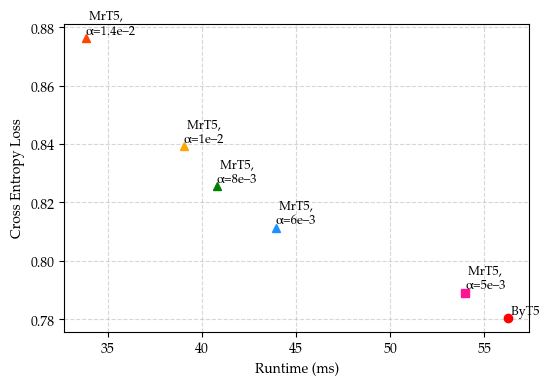

In [9]:
plot_loss_vs_runtime("English", 10000)

## Loss vs. Sequence Length Reduction

In [10]:
# Example usage with the new parameter
file_paths = {
    "ByT5": 'eval_results/span_corruption/T5/t5_span_corruption_seed28_en_only.csv',
    "MrT5, α=5e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.005_seed28_en_only.csv',
    "MrT5, α=6e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.006_seed28_en_only.csv',
    "MrT5, α=8e–3": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.008_seed28_en_only.csv',
    "MrT5, α=1e–2": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.01_seed28_en_only.csv',
    "MrT5, α=1.4e–2": 'eval_results/span_corruption/MrT5/mrt5_span_corruption_0.014_seed28_en_only.csv',
    "Random, 15%": 'eval_results/span_corruption/RandomT5/randomt5_span_corruption_15%_seed28_en_only.csv',
    "Random, 40%": 'eval_results/span_corruption/RandomT5/randomt5_span_corruption_40%_seed28_en_only.csv',
    "Random, 50%": 'eval_results/span_corruption/RandomT5/randomt5_span_corruption_50%_seed28_en_only.csv',
    "Random, 60%": 'eval_results/span_corruption/RandomT5/randomt5_span_corruption_60%_seed28_en_only.csv',
    "Random, 70%": 'eval_results/span_corruption/RandomT5/randomt5_span_corruption_70%_seed28_en_only.csv',
    "Fixed, 15%": 'eval_results/span_corruption/FixedT5/fixedt5_span_corruption_15%_seed28_en_only.csv',
    "Fixed, 40%": 'eval_results/span_corruption/FixedT5/fixedt5_span_corruption_40%_seed28_en_only.csv',
    "Fixed, 50%": 'eval_results/span_corruption/FixedT5/fixedt5_span_corruption_50%_seed28_en_only.csv',
    "Fixed, 60%": 'eval_results/span_corruption/FixedT5/fixedt5_span_corruption_60%_seed28_en_only.csv',
    "Fixed, 70%": 'eval_results/span_corruption/FixedT5/fixedt5_span_corruption_70%_seed28_en_only.csv',
}

In [11]:
losses_df = extract_data_from_files(file_paths, "Eval Cross Entropy Loss")
deleted_tokens_df = extract_data_from_files(file_paths, "Eval Percent Deleted Tokens")

In [12]:
losses_df

,Language,ByT5,"MrT5, α=5e–3","MrT5, α=6e–3","MrT5, α=8e–3","MrT5, α=1e–2","MrT5, α=1.4e–2","Random, 15%","Random, 40%","Random, 50%","Random, 60%","Random, 70%","Fixed, 15%","Fixed, 40%","Fixed, 50%","Fixed, 60%","Fixed, 70%"
0,English,0.780512,0.7891,0.811393,0.825505,0.839268,0.876412,0.820813,0.897616,0.94705,1.003853,1.066414,0.870213,1.016417,1.084814,1.149142,1.220151


In [ ]:
deleted_tokens_df

,Language,ByT5,"MrT5, α=5e–3","MrT5, α=6e–3","MrT5, α=8e–3","MrT5, α=1e–2","MrT5, α=1.4e–2","Random, 15%","Random, 40%","Random, 50%","Random, 60%","Random, 70%","Fixed, 15%","Fixed, 40%","Fixed, 50%","Fixed, 60%","Fixed, 70%"
0,English,0.0,13.886367,47.02959,57.018564,62.826377,71.33376,14.87168,40.077598,50.157021,60.003252,70.01415,13.887344,38.346562,48.601562,58.4625,68.485938


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def darken_color(color, factor=0.7):
    """
    Darkens a given color by multiplying the RGB values by the factor.
    Factor should be between 0 and 1, where 1 means no change and 0 means black.
    """
    return tuple(np.array(color[:3]) * factor)  # Ignore alpha if present

def plot_loss_vs_deletions(language):
    print(f"Plotting for {language}")
    
    # Extract data for the language
    lang_losses = losses_df[losses_df['Language'] == language].drop('Language', axis=1)
    lang_deleted_tokens = deleted_tokens_df[deleted_tokens_df['Language'] == language].drop('Language', axis=1)

    # Convert column names to a more usable format by removing '\n' and replacing ','
    lang_losses.columns = [col.replace('\n', ' ') for col in lang_losses.columns]
    lang_deleted_tokens.columns = [col.replace('\n', ' ') for col in lang_deleted_tokens.columns]

    # Generate rainbow colors using the length of the number of models
    num_models = len(lang_losses.columns)
    colors = plt.cm.rainbow(np.linspace(0, 1, num_models))

    # Plotting with adjusted text positions to reduce overlap
    shapes = ['o', '^', '^', '^', '^', '^', 'X', 'X', 'X', 'X', 'X', 'd', 'd', 'd', 'd', 'd']
    plt.figure(figsize=(8, 4))
    texts = []  # List to hold text objects for adjustment
    for i, model in enumerate(lang_losses.columns):
        x = lang_deleted_tokens[model]
        y = lang_losses[model]
        
        # Determine if color needs darkening based on luminance or specific condition
        color = colors[i]
        # Darken the color if the y-values are low (as an example of a light point)
        if np.mean(y) < 0.2:  # Adjust this threshold based on your data
            color = darken_color(color)
        
        plt.plot(x, y, marker=shapes[i], color=color, label=model)
        for x_i, y_i in zip(x, y):
            if '6e–3' in model or '8e–3' in model or '5e–3' in model:
                texts.append(plt.text(x_i+0.08, y_i-0.008, model, ha='left', verticalalignment='top', fontsize=11))
            elif 'ByT5' in model:
                texts.append(plt.text(x_i+0.08, y_i+0.005, model, ha='left', verticalalignment='bottom', fontsize=11, weight='bold'))
            else:
                texts.append(plt.text(x_i+0.08, y_i+0.005, model, ha='left', verticalalignment='bottom', fontsize=11))

    plt.xlabel('Sequence Length Reduction (%)', fontsize=12)
    plt.ylabel('Cross Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    if language == 'English':
        # Save fig as pdf
        plt.savefig(f"figures/span_corruption_{language}.pdf")
    
    plt.show()



Plotting for English


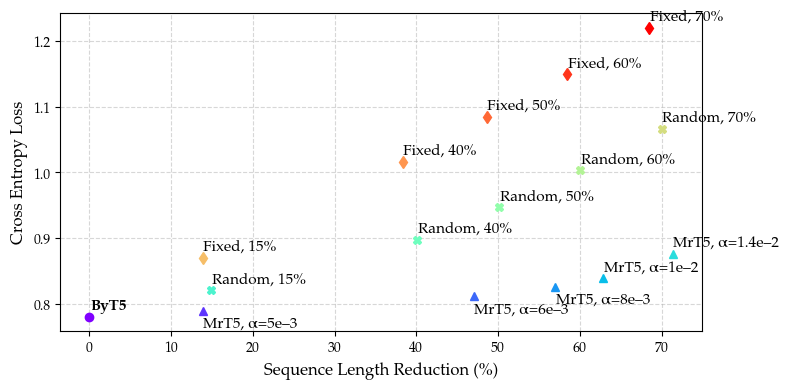

In [15]:
plot_loss_vs_deletions("English")

## Multilingual Eval

In [16]:
def clean_loss_dataset(byt5_df, mrt5_df):
    """
    This function takes two dataframes, one containing ByT5 losses and another containing MrT5 losses, 
    and combines them into a single dataframe for analysis.
    
    Both dataframes are expected to have the same layout with the columns:
    'Language', 'Eval Cross Entropy Loss', and 'Eval Percent Deleted Tokens'.

    Parameters:
    byt5_df: The dataframe containing ByT5 losses.
    mrt5_df: The dataframe containing MrT5 losses.

    Returns:
    A combined dataframe with columns: 'Language', 'ByT5 Loss', 'MrT5 Loss', 'Seq. Len. Reduction (%)'
    """
    # Select necessary columns from both dataframes
    byt5_clean = byt5_df[['Language', 'Eval Cross Entropy Loss']].copy()
    mrt5_clean = mrt5_df[['Language', 'Eval Cross Entropy Loss', 'Eval Percent Deleted Tokens']].copy()

    # Rename columns for clarity
    byt5_clean.columns = ['Language', 'ByT5 Loss']
    mrt5_clean.columns = ['Language', 'MrT5 Loss', 'Seq. Len. Reduction (%)']

    # Merge the two dataframes on 'Language' and 'Seq. Len. Reduction (%)'
    combined_df = pd.merge(byt5_clean, mrt5_clean[['Language', 'MrT5 Loss', 'Seq. Len. Reduction (%)']], on='Language')

    return combined_df

mrt5_monolingual_df = pd.read_csv('eval_results/span_corruption/MrT5/mrt5_span_corruption_0.01_seed28.csv')
t5_monolingual_df = pd.read_csv('eval_results/span_corruption/T5/t5_span_corruption_seed28.csv')
mrt5_multilingual_df = pd.read_csv('eval_results/span_corruption_multilingual/MrT5/mrt5_span_corruption_multilingual_0.012_seed28.csv')
t5_multilingual_df = pd.read_csv('eval_results/span_corruption_multilingual/T5/t5_span_corruption_multilingual_seed28.csv')

monolingual_combined_df = clean_loss_dataset(t5_monolingual_df, mrt5_monolingual_df)
multilingual_combined_df = clean_loss_dataset(t5_multilingual_df, mrt5_multilingual_df)

/tmp/user/23069/ipykernel_3937638/974834217.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = plt.cm.get_cmap('rainbow', len(unique_languages1))
/tmp/user/23069/ipykernel_3937638/974834217.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors2 = plt.cm.get_cmap('rainbow', len(unique_languages2))


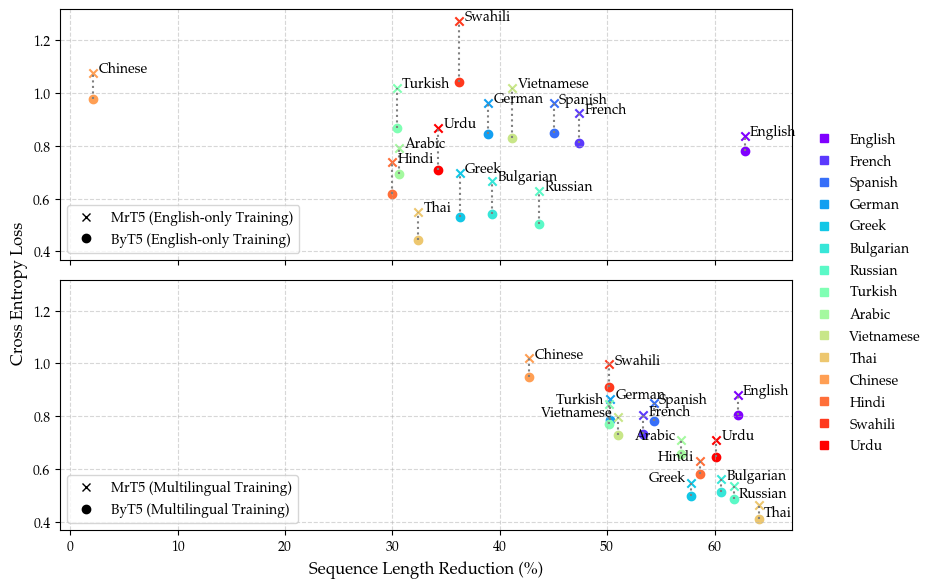

In [17]:
def plot_stacked_losses_with_labels_and_colors(df1, df2):
    """
    This function takes two dataframes with the same structure as input and plots 
    a stacked chart showing the loss vs sequence length reduction for both datasets,
    with labels and different colors for each language.
    """
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, sharey=True)

    # Get a color map based on the number of unique languages
    unique_languages1 = df1['Language'].unique()
    unique_languages2 = df2['Language'].unique()
    colors1 = plt.cm.get_cmap('rainbow', len(unique_languages1))
    colors2 = plt.cm.get_cmap('rainbow', len(unique_languages2))

    # Plot for the first dataframe
    for i, language in enumerate(unique_languages1):
        subset = df1[df1['Language'] == language]
        color = colors1(i)
        axs[0].scatter(subset['Seq. Len. Reduction (%)'], subset['ByT5 Loss'], color=color, label=language, marker='o')
        axs[0].scatter(subset['Seq. Len. Reduction (%)'], subset['MrT5 Loss'], color=color, marker='x')
        for j in range(len(subset)):
            axs[0].plot([subset['Seq. Len. Reduction (%)'].iloc[j], subset['Seq. Len. Reduction (%)'].iloc[j]],
                        [subset['ByT5 Loss'].iloc[j], subset['MrT5 Loss'].iloc[j]],
                        color='gray', linestyle='dotted')
            # Add label for MrT5 Loss
            axs[0].text(subset['Seq. Len. Reduction (%)'].iloc[j] + 0.5, subset['MrT5 Loss'].iloc[j], language, fontsize=10)

    axs[0].grid(True, linestyle='--', alpha=0.5)

    # Plot for the second dataframe
    for i, language in enumerate(unique_languages2):
        subset = df2[df2['Language'] == language]
        color = colors2(i)
        axs[1].scatter(subset['Seq. Len. Reduction (%)'], subset['ByT5 Loss'], color=color, label=language, marker='o')
        axs[1].scatter(subset['Seq. Len. Reduction (%)'], subset['MrT5 Loss'], color=color, marker='x')
        for j in range(len(subset)):
            axs[1].plot([subset['Seq. Len. Reduction (%)'].iloc[j], subset['Seq. Len. Reduction (%)'].iloc[j]],
                        [subset['ByT5 Loss'].iloc[j], subset['MrT5 Loss'].iloc[j]],
                        color='gray', linestyle='dotted')
            # Add label for MrT5 Loss
            if language in ("Russian", "Thai"):
                axs[1].text(subset['Seq. Len. Reduction (%)'].iloc[j] + 0.5, subset['MrT5 Loss'].iloc[j], language, fontsize=10, va='top')
            elif language in ("Hindi", "Greek", "Turkish", "Vietnamese", "Arabic"):
                axs[1].text(subset['Seq. Len. Reduction (%)'].iloc[j] - 0.5, subset['MrT5 Loss'].iloc[j], language, fontsize=10, ha='right')
            else:
                axs[1].text(subset['Seq. Len. Reduction (%)'].iloc[j] + 0.5, subset['MrT5 Loss'].iloc[j], language, fontsize=10)

    axs[1].set_xlabel('Sequence Length Reduction (%)', fontsize=12)
    axs[1].grid(True, linestyle='--', alpha=0.5)

    # Add a common y-label for both subplots
    fig.text(-0.01, 0.5, 'Cross Entropy Loss', va='center', rotation='vertical', fontsize=12)

    # Create a custom legend for ByT5 and MrT5
    mrt5_marker = plt.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label='MrT5 (English-only Training)')
    byt5_marker = plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='ByT5 (English-only Training)')
    axs[0].legend(handles=[mrt5_marker, byt5_marker], loc='lower left')

    mrt5_marker = plt.Line2D([], [], color='black', marker='x', linestyle='None', markersize=6, label='MrT5 (Multilingual Training)')
    byt5_marker = plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='ByT5 (Multilingual Training)')
    axs[1].legend(handles=[mrt5_marker, byt5_marker], loc='lower left')

    # Create a custom legend with all languages
    handles = [plt.Line2D([0], [0], marker='s', color=colors1(i), linestyle='', markersize=6) for i in range(len(unique_languages1))]
    fig.legend(handles, unique_languages1, loc='center left', bbox_to_anchor=(0.975, 0.5), frameon=False, fontsize=10)

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.savefig(f"figures/span_corruption_multilingual_eval.pdf", bbox_inches='tight')
    plt.show()

# Now let's plot the two datasets with different colors for languages
plot_stacked_losses_with_labels_and_colors(monolingual_combined_df , multilingual_combined_df)


# Loss vs Sequence Length Reduction (Large Models)

In [9]:
# Example usage with the new parameter
file_paths = {
    "ByT5": 'eval_results/span_corruption/T5/byt5-large_span_corruption_seed18_en_only.csv',
    "MrT5, 15%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl15%_seed18_en_only.csv',
    "MrT5, 30%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl30%_seed18_en_only.csv',
    "MrT5, 40%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl40%_seed18_en_only.csv',
    "MrT5, 50%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl50%_seed18_en_only.csv',
    "MrT5, 60%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl60%_seed18_en_only.csv',
    "MrT5, 70%": 'eval_results/span_corruption/MrT5/mrt5-large_span_corruption_pctrl70%_seed18_en_only.csv',
    "RandomT5, 15%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_15%_seed28_en_only.csv',
    "RandomT5, 30%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_30%_seed28_en_only.csv',
    "RandomT5, 40%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_40%_seed28_en_only.csv',
    "RandomT5, 50%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_50%_seed28_en_only.csv',
    "RandomT5, 60%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_60%_seed28_en_only.csv',
    "RandomT5, 70%": 'eval_results/span_corruption/RandomT5/randomt5-large_span_corruption_70%_seed28_en_only.csv',
}

In [13]:
losses_df = extract_data_from_files(file_paths, "Eval Cross Entropy Loss")
deleted_tokens_df = extract_data_from_files(file_paths, "Eval Percent Deleted Tokens")
runtimes_df = extract_data_from_files(file_paths, "Eval Runtime")

In [11]:
losses_df

,Language,ByT5,"MrT5, 15%","MrT5, 30%","MrT5, 40%","MrT5, 50%","MrT5, 60%","MrT5, 70%","RandomT5, 15%","RandomT5, 30%","RandomT5, 40%","RandomT5, 50%","RandomT5, 60%","RandomT5, 70%"
0,English,0.589564,0.599229,0.61019,0.616187,0.624954,0.638307,0.676086,0.634093,0.679418,0.721832,0.762843,0.832783,0.966301


In [12]:
deleted_tokens_df

,Language,ByT5,"MrT5, 15%","MrT5, 30%","MrT5, 40%","MrT5, 50%","MrT5, 60%","MrT5, 70%","RandomT5, 15%","RandomT5, 30%","RandomT5, 40%","RandomT5, 50%","RandomT5, 60%","RandomT5, 70%"
0,English,0.0,20.775225,33.348379,42.308096,51.131494,59.732031,68.040332,15.163818,30.255029,40.031602,50.06501,59.825068,69.986445


In [14]:
runtimes_df

,Language,ByT5,"MrT5, 15%","MrT5, 30%","MrT5, 40%","MrT5, 50%","MrT5, 60%","MrT5, 70%","RandomT5, 15%","RandomT5, 30%","RandomT5, 40%","RandomT5, 50%","RandomT5, 60%","RandomT5, 70%"
0,English,1890.146674,1650.607278,1388.886447,1187.093007,1058.604594,968.625386,817.660437,1757.462071,1443.375139,1219.982876,1034.369951,884.310071,743.755242
